In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
clean_data_dir = os.path.join('..','data_files','clean_data')
lake_colors_d = {'Superior':'blue',
                 'Michigan':'red',
                 'Huron':'green',
                 'Erie':'purple',
                 'Ontario':'orange'}

In [3]:
lake_stats = pd.read_csv(os.path.join(clean_data_dir,'lake_stats.csv'),index_col=0)
lakes = lake_stats.index.tolist()

In [4]:
ice_coverage = pd.read_csv(os.path.join('..','data_files','ice_data','ice_coverage.csv'),index_col='Date')
ice_coverage.head()

,Unnamed: 0,Superior,Michigan,Huron,Erie,Ontario,Weekday,Year,Month,Day,Period
Date,,,,,,,,,,,
1972-12-19,0,0.00,NaN,NaN,NaN,NaN,Tuesday,1972,12,19,1972-12
1972-12-20,1,16.62,9.21,25.26,0.0,0.61,Wednesday,1972,12,20,1972-12
1972-12-28,2,9.35,12.09,12.65,0.0,2.98,Thursday,1972,12,28,1972-12
1973-01-02,3,13.03,6.53,22.00,3.4,2.80,Tuesday,1973,1,2,1973-01
1973-01-09,4,29.69,21.55,31.30,25.4,21.40,Tuesday,1973,1,9,1973-01


In [5]:
max_coverage = ice_coverage[lakes].max()
max_coverage

Superior    100.00
Michigan     93.33
Huron        98.50
Erie        100.00
Ontario      86.26
dtype: float64

In [6]:
max_yrs = {}
temp = []
max_days = []
for lake in lakes:
    max_days = ice_coverage.index[ice_coverage[lake] == max_coverage[lake]].tolist()
    max_yrs[lake] = np.unique([int(x[:4]) for x in max_days]).tolist()
max_yrs

{'Superior': [1996],
 'Michigan': [2014],
 'Huron': [1994],
 'Erie': [1978, 1979, 1996],
 'Ontario': [1979]}

In [7]:
ice_coverage.index[ice_coverage['Erie'] == max_coverage['Erie']].tolist()

['1978-02-08',
 '1978-02-15',
 '1978-02-22',
 '1978-03-01',
 '1978-03-08',
 '1979-02-12',
 '1996-02-05',
 '1996-02-16']

In [8]:
surface_area = lake_stats['Water Area (km2)']
volume = lake_stats['Volumea (km3)']
surface_area

Superior    82100
Michigan    57800
Huron       59600
Erie        25700
Ontario     18960
Name: Water Area (km2), dtype: int64

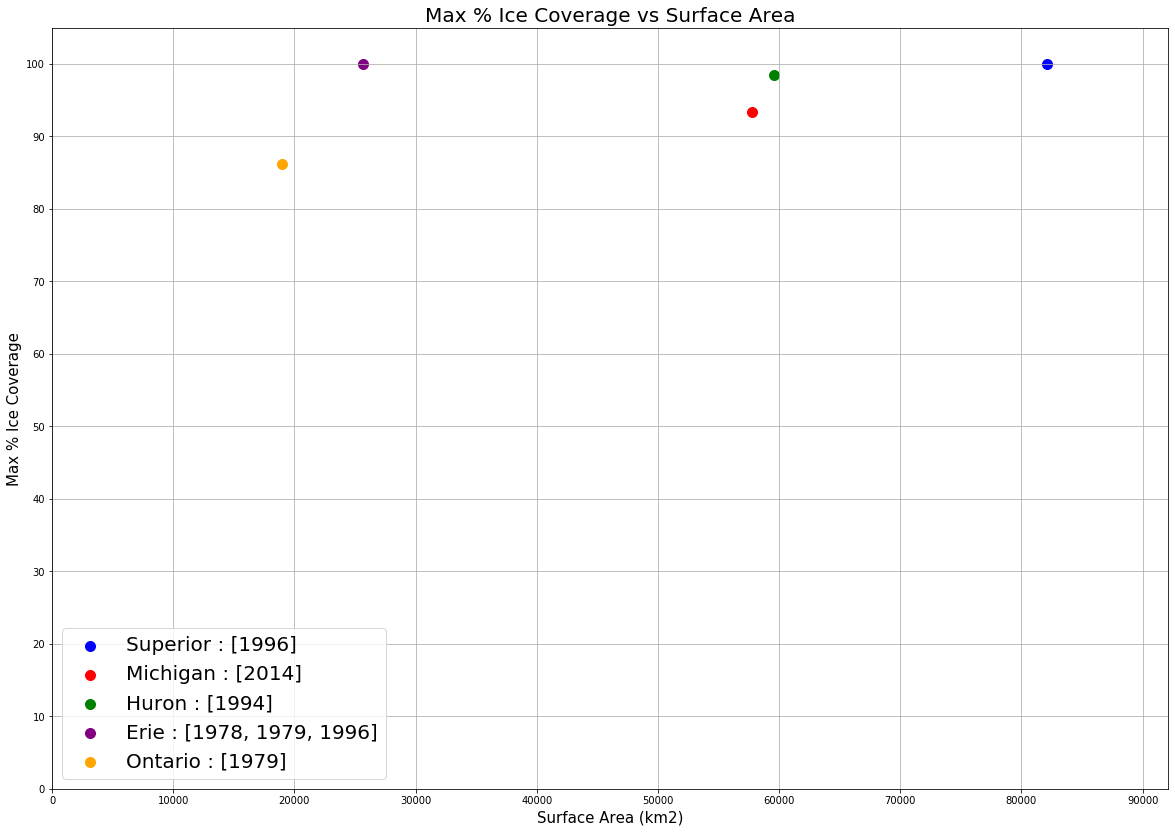

In [11]:
plt.figure(figsize=(20,14))
plt.title('Max % Ice Coverage vs Surface Area',fontsize=20)
for lake in lakes:
    plt.scatter(surface_area[lake],max_coverage[lake],s=100,c=lake_colors_d[lake],label=f"{lake} : {max_yrs[lake]}")
plt.xlabel('Surface Area (km2)',fontsize=15)
plt.ylabel('Max % Ice Coverage',fontsize=15)
plt.xlim(0,max(surface_area.values)+10000)
plt.ylim(0,105)
plt.xticks(np.arange(0,max(surface_area.values)+10000,step=10000))
plt.yticks(np.arange(0,105,step=10))
plt.legend(fontsize=20)
plt.grid()
plt.savefig(os.path.join('..','images','SAvsMIC.png'))
plt.show()